In [12]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
import theano
from theano import tensor as T,function
from IPython import display
import time

In [13]:
noise_var = 0.5
n_samples = 1000 
n = np.random.normal(0,noise_var, n_samples)
x = np.arange(n_samples)

from sklearn import preprocessing
x = preprocessing.scale(x)

C:\Users\partha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [14]:
w,b = np.random.randn(2)
d = w*x + b
y = d + n

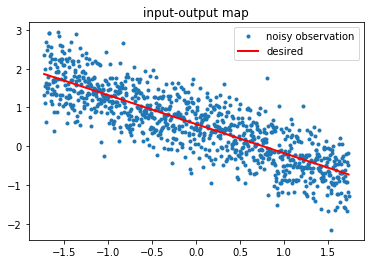

None


In [15]:
plt.plot(x,y,'.')
plt.plot(x,d,'-r',linewidth=2)
plt.legend(('noisy observation','desired'))
plt.title('input-output map')
print(plt.show())

In [23]:
X,Y = T.vectors('input','desired')
W = theano.shared(.01)
B = theano.shared(0.)
Z = W * X + B
Cost = ((Y-Z) ** 2).mean()
params = [W,B]

In [24]:
lr = .1
grads = [T.grad(Cost,p) for p in params]
updates = [(p,p - lr* g) for p,g in zip(params,grads)]
print(updates)

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0), (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]


In [25]:
train = function([X,Y],Cost, updates = updates )

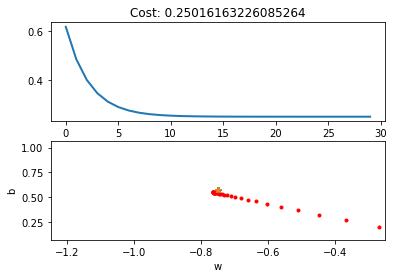

In [28]:
epochs = 30
final_cost = []
for i in range(epochs):
    final_cost.append(train(x,y))
    what ,bhat = W.get_value(), B.get_value()
    
    # cost function
    plt.subplot(211)
    plt.cla()
    plt.title('Cost: {}'.format(final_cost[-1]))
    plt.plot(final_cost , linewidth = 2)
    
    # parameter space
    plt.subplot(212)
    plt.plot(w,b,'*', linewidth = 2)
    plt.plot(what,bhat,'.r', linewidth = 2)
    plt.xlim([w - .5, w + .5])
    plt.ylim([b - .5, b + .5])
    plt.xlabel('w')
    plt.ylabel('b')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(10)
    
    